#  Science des données du changement climatique: étude du CO2 atmosphérique

Ce Projet porte sur l'évolution du dioxyde de carbone (CO2) atmosphérique. Ce Projet utilise des données historiques à long terme . 

Nous allons travailler avec des données historiques et publiques de CO2 atmosphérique.

## Unité de mesure

Lors de la mesure des gaz, le terme *concentration* est utilisé pour décrire la quantité de gaz par volume dans l'air. Les deux unités de mesure les plus courantes sont les parties par million (ppm) et la concentration en pourcentage. Toutes nos données utilisent les parties par million comme unité de mesure.
Les parties par million (abrégées ppm) représentent le [rapport](https://www.co2meter.com/fr-fr/blogs/news/15164297-co2-gas-concentration-defined) d'un gaz par rapport à un autre. Par exemple, 1 000 ppm de CO2 signifie que si vous pouviez compter un million de molécules de gaz, 1 000 d'entre elles seraient du dioxyde de carbone et 999 000 molécules seraient d'autres gaz.
### Etudiant : Rafik BENNACER


## Chargment des librairies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from urllib.request import urlretrieve
import urllib.parse
from scipy import stats
import seaborn as sns
import numpy as np
from collections import deque

## Les données atmosphériques récentes

#### Introduction

Nous allons nous intéresser aux données sur le dioxyde de carbone (CO2) atmosphérique recueillies au Mauna Loa Observatory. Elles fournissent l'un des ensembles de données les plus emblématiques et précieux pour surveiller les changements dans la composition atmosphérique. Situé sur l'île d'Hawaï, le Mauna Loa Observatory est perché à une altitude élevée, à environ 3 400 mètres au-dessus du niveau de la mer. Les mesures de CO2 ont débuté en 1958 sous la direction du Dr Charles David Keeling, et c'est le célèbre "Keeling Curve" qui en résulte, une courbe montrant l'augmentation régulière des concentrations de CO2 au fil du temps. Les données sont collectées en prélevant des échantillons d'air à diverses altitudes pour minimiser les influences locales et en analysant ces échantillons par spectroscopie infrarouge.

L'histoire de l'ensemble de données du Mauna Loa est essentielle pour comprendre le changement climatique. Les mesures de Keeling ont d'abord confirmé la tendance à la hausse à long terme des concentrations de CO2, soulignant le rôle humain dans l'augmentation des émissions de gaz à effet de serre. Les données de Mauna Loa sont régulièrement mises à jour et continuent d'être une référence cruciale pour évaluer l'efficacité des politiques de réduction des émissions et comprendre l'ampleur du défi du changement climatique.

Les méthodes de mesure de Keeling au Mauna Loa ont été tellement influentes qu'elles ont conduit à la création du [Programme d'observation de l'atmosphère](https://gml.noaa.gov/) de la NOAA (National Oceanic and Atmospheric Administration) en 1974, qui étend le réseau mondial de surveillance des gaz à effet de serre. Ainsi, le Mauna Loa Observatory et son ensemble de données historiques continuent d'être un pilier dans l'étude des changements climatiques et de sensibilisation mondiale.

Aujourd'hui, la zone de recherche de ce programme a été étendue et il mesure la distribution atmosphérique et les tendances des trois principaux moteurs à long terme du changement climatique, le dioxyde de carbone (CO2), le méthane (CH4) et le protoxyde d'azote (N2O), ainsi que le monoxyde de carbone (CO), qui est un indicateur important de la pollution de l'air.

#### Analyse de données

**Question**: D'après le cours et selon vous, en quoi est-ce important de surveiller l'évolution du CO2 atmosphérique?     
Pour faciliter la correction, rédigez vos réponses en vert à l'aide du conteneur HTML `span style="color:green` utilisé comme dans la cellule ci-dessous.

<span style="color:green">
L'étude de cette évolution est cruciale pour comprendre les impacts du réchauffement climatique et développer des stratégies d'adaptation et d'atténuation. La surveillance du CO2 atmosphérique aide à évaluer l'efficacité des politiques environnementales et à guider les actions futures pour limiter le réchauffement global



Le jeu de données est stocké sous format texte sur le site du [GML](https://gml.noaa.gov/dv/site/?program=ccgg&active=1). Il utilise des espaces comme séparateur et comporte 20 colonnes pour 593 lignes. Il contient un code de site, qui fait référence à l'observatoire où les données ont été enregistrées, la date, de l'année jusqu'à la seconde près, l'enregistrement du CO2 et d'autres attributs des mesures.

Ci-dessous voici comment télécharger les données (l'observatoire est codé par les 3 lettres mlo):

In [2]:
filename = f"co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt"
url = f"https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/txt/{filename}"
if not Path(filename).is_file():
   urlretrieve(url, filename)

1. Chargez le jeu de données dans la table `df_mlo`. Filtrez les données et conservez uniquement les colonnes suivantes: *year*, *month*, *datetime*, *time_decimal*, *value*.

In [3]:
 col = ['year' , 'month' , 'datetime' , 'time_decimal' , 'value']
def read_file(file):
    return pd.read_csv(file, sep = ' ' , comment = '#',usecols=col )

In [4]:
df_mlo = read_file (filename) 

In [5]:
df_mlo.head()

,year,month,datetime,time_decimal,value
0,1973,8,1973-08-01T00:00:00Z,1973.580822,-999.99
1,1973,9,1973-09-01T00:00:00Z,1973.665753,-999.99
2,1973,10,1973-10-01T00:00:00Z,1973.747945,-999.99
3,1973,11,1973-11-01T00:00:00Z,1973.832877,-999.99
4,1973,12,1973-12-01T00:00:00Z,1973.915068,-999.99


In [6]:
df_mlo.describe ()

,year,month,time_decimal,value
count,605.000000,605.000000,605.000000,605.000000
mean,1998.289256,6.528926,1998.748082,331.705107
std,14.567403,3.457582,14.566047,228.074939
min,1973.000000,1.000000,1973.580822,-999.990000
25%,1986.000000,4.000000,1986.161644,346.440000
50%,1998.000000,7.000000,1998.747945,365.640000
75%,2011.000000,10.000000,2011.328767,390.400000
max,2023.000000,12.000000,2023.915068,421.900000


2. Comment sont indiquées les valeurs manquantes ? Ouvrez le fichier avec un lecteur de fichier texte et lisez les commentaires. Y a t il des données manquantes dans le jeu de données ? Indiquez les avec des `NA`. Quelles sont les valeurs minimales et maximales du jeu de données ?


In [7]:
df_mlo = pd.read_csv(filename, sep = ' ' , comment = '#',usecols=col  , na_values= -999.99 )

In [8]:
df_mlo.describe()

,year,month,time_decimal,value
count,605.000000,605.000000,605.000000,588.000000
mean,1998.289256,6.528926,1998.748082,370.206497
std,14.567403,3.457582,14.566047,26.083077
min,1973.000000,1.000000,1973.580822,327.300000
25%,1986.000000,4.000000,1986.161644,348.215000
50%,1998.000000,7.000000,1998.747945,367.165000
75%,2011.000000,10.000000,2011.328767,391.327500
max,2023.000000,12.000000,2023.915068,421.900000



<span style="color:green">
Dans la documentation du jeu de données, il est indiqué que les données manquantes sont marquées avec -999.999, mais en réalité, elles étaient marquées avec -999.99, une quantité absurde, ce qui était une erreur corrigée par leur substitution par la valeur NaN
<br>
L'utilisation de pd.describe() fournit un résumé des valeurs minimales et maximales, parmi 
ces valeurs on a la valeur ['value'] minimale est de 327.3 et la valeur maximale est de 420.97





3. Pour lisser les enregistrements de CO2, calculez par la méthode des fenetres glissantes (de 11 valeurs centrées et un pas de 1) le CO2 moyen de chaque mois. Ajoutez une colonne `value_rollmean` contenant cette information.


*Explications:* Ce nombre 11 a été choisi pour recentrer la valeur moyenne sur l'ensemble de l'année, éliminant ainsi la variabilité saisonnière. À n'importe quel moment, le CO2 enregistré est ajusté par les valeurs du cycle saisonnier le plus proche, comprenant ainsi quatre saisons.

In [9]:
df_mlo = df_mlo.dropna(how = 'any' , subset = ['value'] ) 

In [10]:
df_mlo['value_rollmean'] = df_mlo['value'].rolling(window=11, min_periods=1, center=True).mean()



4. Décrivez maintenant votre jeu de données:

In [11]:
df_mlo.describe()

,year,month,time_decimal,value,value_rollmean
count,588.000000,588.000000,588.000000,588.000000,588.000000
mean,1998.416667,6.539116,1998.876340,370.206497,370.201072
std,14.168547,3.440440,14.171960,26.083077,25.991636
min,1974.000000,1.000000,1974.328767,327.300000,329.753750
25%,1986.000000,4.000000,1986.644521,348.215000,347.822955
50%,1998.000000,7.000000,1998.873973,367.165000,367.682273
75%,2011.000000,10.000000,2011.104110,391.327500,391.355682
max,2023.000000,12.000000,2023.915068,421.900000,420.140000


<span style="color:green">
Les données sont centrées autour de l'année 1998, avec des valeurs moyennes de 'value' autour de 369.69 et des 'value_rollmean' environ 369.39.


5. Faites une représentation graphique des enregistrements de CO2 de 1973 jusqu'à maintenant, a-t-on bien lissé les données avec les fenetres glissantes ?

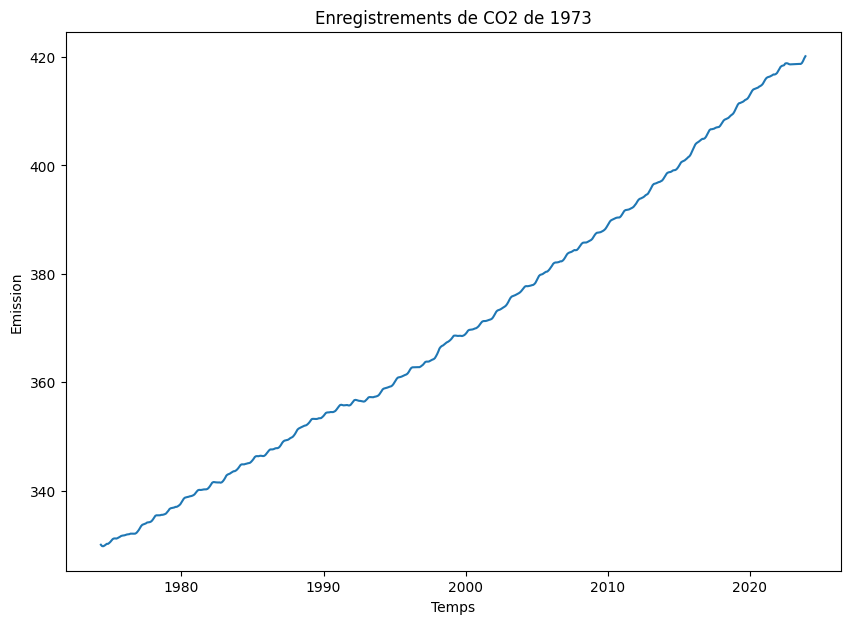

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(df_mlo['time_decimal'], df_mlo.value_rollmean )
plt.xlabel("Temps")
plt.ylabel("Emission")
plt.title("Enregistrements de CO2 de 1973")
plt.show()

<span style="color:green">
Oui, les données semblent bien lissées avec l'application des fenêtres glissantes, comme le montre la courbe régulière et sans à-coups sur le graphique des enregistrements de CO2 de 1973 à aujourd'hui.


6. Faites maintenant des prédictions jusqu'en 2050. Quel(s) type(s) de regressions avez vous choisi et pourquoi ? Représentez vos résultats sur une figure. Discutez des valeurs de CO2 qu'on s'attend à atteindre en 2050 et des limites de vos prédictions.

In [13]:
df_mlo = df_mlo.dropna(axis = 0 , how = 'any' ,subset= ['value_rollmean'] ,  inplace= False ) 

### j'ai choisi d'utilisé Linear Regression pour faire des prédicitions allant jusqu'en 2050

On split notre jeu de données en 2 parties : train et test

In [14]:
msk = np.random.rand(len(df_mlo)) < 0.8
train = df_mlo[msk]
test = df_mlo[~msk]

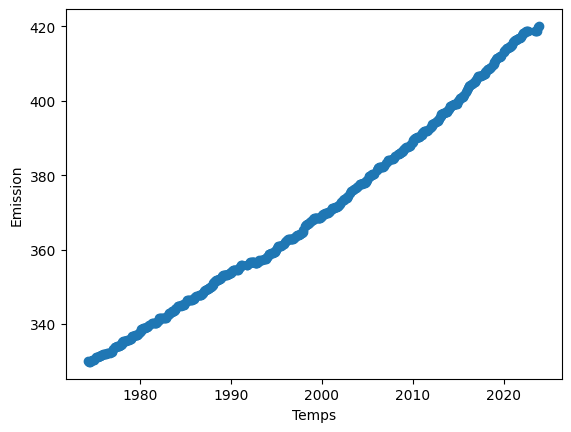

In [15]:
plt.scatter(train['time_decimal'], train.value_rollmean)
plt.xlabel("Temps")
plt.ylabel("Emission")
plt.show()

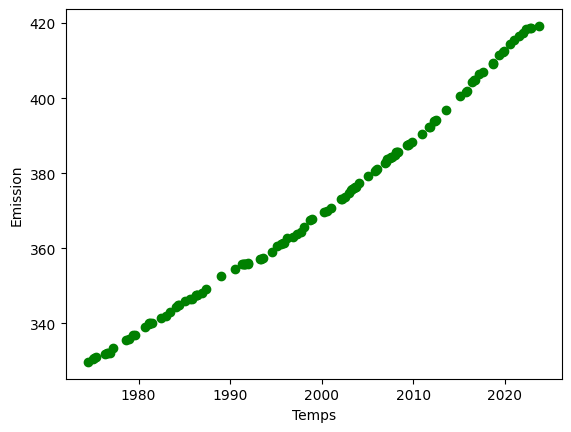

In [16]:
plt.scatter(test['time_decimal'], test.value_rollmean,  color='green')
plt.xlabel("Temps")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [18]:
train_x = np.asanyarray(train[['time_decimal']])
train_y = np.asanyarray(train[['value_rollmean']])
regr.fit (train_x, train_y)

LinearRegression()

Text(0, 0.5, 'Emission')

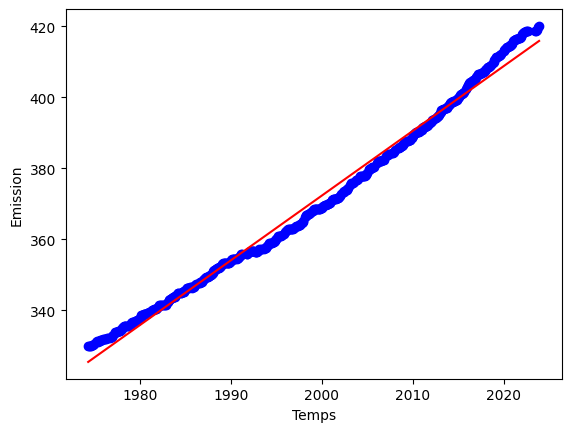

In [19]:
plt.scatter(train['time_decimal'], train['value_rollmean'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red')
plt.xlabel("Temps")
plt.ylabel("Emission")

In [20]:
y2050 = np.array([[2050]])
value_2050 = regr.predict(y2050)
print(value_2050)

[[463.51940237]]


<span style="color:green">
La valeur prédite pour 2050 est de 463.58
<br>
Selon ce modèle, les émissions de CO2 continueront à augmenter jusqu'en 2050, suivant une droite qui s'accélère linéairement. Ceci reflète l'hypothèse que, malgré les efforts pour réduire les émissions, des facteurs tels que la croissance économique, l'augmentation de la population, et les défis liés à la transition énergétique pourraient entraîner une augmentation globale des émissions.

### Limites des prédictions

***1-les données***  : ce modèle ne prend en compte que la tendance historique et ne considère pas les nombreux facteurs externes qui peuvent affecter les émissions de CO2, tels que les changements technologiques, les politiques environnementales, les crises économiques, ou les innovations en matière d'énergie renouvelable.

***2-d'autres variables*** : Le modèle ne tient pas compte des variables externes qui pourraient avoir un impact significatif sur les émissions de CO2, telles que les changements dans les politiques gouvernementales, les avancées technologiques, ou les variations dans l'activité économique globale.

***3-incertitude*** : La prédiction repose sur l'hypothèse que les tendances passées se poursuivront de la même manière, ce qui n'est pas garanti. Les événements futurs imprévus peuvent considérablement dévier les émissions réelles des prédictions.

In [21]:
test_x = np.asanyarray(test[['time_decimal']])
test_y = np.asanyarray(test[['value_rollmean']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))

Mean absolute error: 2.27


## Les données de paléoclimatologie : estimation du CO2 historique

#### Introduction

Les données paléoclimatiques sur les concentrations passées de dioxyde de carbone (CO2), offrent une perspective historique sur les variations naturelles des niveaux de CO2 sur de vastes échelles de temps. La méthode la plus directe pour étudier les variations passées de la concentration atmosphérique de CO2 avant les mesures continues de CO2 atmosphérique, consiste à analyser l'air extrait de carottes de glace appropriées ([Siegenthaler et al., 2005](https://doi.org/10.1594/PANGAEA.728135)).

La mesure de la composition gazeuse est directe : emprisonnées dans les carottes de glace profondes se trouvent de minuscules bulles d'air ancien que nous pouvons extraire et analyser à l'aide de spectromètres de masse (https://www.scientificamerican.com/article/how-are-past-temperatures/).

En examinant les données paléoclimatiques en parallèle avec les mesures contemporaines, nous allons évaluer l'impact des activités humaines sur l'augmentation récente des concentrations de CO2. 


#### Des années 1000 à 2004

En 2010, les données sur le CO2 préindustriel ont été estimées à l'aide de deux carottes de glace. Les mesures pour Law Dome (LD) et Dronning Maud Land (DML) étaient suffisantes pour obtenir des estimations lissées, avec des splines sur 50 ans, de l'évolution du CO2 entre 1000 et 2004 ([Frank et al., 2010](https://pubmed.ncbi.nlm.nih.gov/20110999/)).

Ces données sont disponibles dans la base de données de paléoclimatologie de la NOAA, sous l'étude [10437](https://www.ncei.noaa.gov/access/paleo-search/study/10437).

Le jeu de données est également stocké sous un format texte, utilisant des tabulations comme séparateurs, et comprend 23 colonnes pour 1005 lignes. Il contient l'année d'enregistrement, de 1000 à 2004, et trois valeurs principales : l'enregistrement à Law Dome (LD), l'enregistrement à Dronning Maud Land (DML) et l'enregistrement moyen sur ces deux sites. Chacune de ces valeurs est lissée à l'aide de splines sur une plage de 50 à 200 ans, avec un intervalle de 25 ans.

1. Le fichier du jeu de données se situe [ici](https://www.ncei.noaa.gov/pub/data/paleo/contributions_by_author/frank2010/smoothedco2.txt).
Chargez le dans une table nommée `df_indus`

In [22]:
file = f"smoothedco2.txt"
url = f"https://www.ncei.noaa.gov/pub/data/paleo/contributions_by_author/frank2010/{file}"
if not Path(file).is_file():
   urlretrieve(url, file)

In [23]:
df_indus = pd.read_csv(file, sep = '\t' )

In [24]:
df_indus.head()

,Year,ALL_50_full,LD_050,DML_050,ALL_050,LD_075,DML_075,ALL_075,LD_100,DML_100,...,ALL_125,LD_150,DML_150,ALL_150,LD_175,DML_175,ALL_175,LD_200,DML_200,ALL_200
0,1000,278.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,278.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,278.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,278.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,278.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En regardant le tableau, on choisit d'étudier `ALL_50_full` qui est la moyenne entre les sites LD et DML lissées sur une plage de 50 ans. Elle ne contient pas de valeurs manquantes car les données ont été traitées par les auteurs de l'étude.

2. Sélectionnez les colonnes d'interet et décrivez votre jeu de données.

In [25]:
colonnes = ['Year' , 'ALL_50_full']
df_indus = df_indus[colonnes]

In [26]:
df_indus.describe()

,Year,ALL_50_full
count,1005.000000,1005.000000
mean,1502.000000,284.887801
std,290.262812,14.310892
min,1000.000000,276.450000
25%,1251.000000,279.600000
50%,1502.000000,280.980000
75%,1753.000000,282.100000
max,2004.000000,372.930000


<span style="color:green">
Les données sont centrées autour de l'année 1502, avec des valeurs moyennes de 'ALL_50_full' autour de 285 et maximales de de 372.93

3. Ces valeurs vont jusqu'en 2004, et les valeurs moyennes ont enregistrées à Mauna Loa depuis 1974.
Les concentrations en CO2 entre 1974 et 2004 corrèlent elles entre les deux jeux de données ? Expliquez quelles colonnes de vos jeux de données vous avez décider de comparer.

In [27]:
df_mlo_yearly = df_mlo.groupby('year')['value_rollmean'].mean().reset_index()

In [28]:
df_mlo_yearly.head()

,year,value_rollmean
0,1974,330.022924
1,1975,331.221157
2,1976,332.043485
3,1977,333.823409
4,1978,335.427045


In [29]:
df_indus.head()

,Year,ALL_50_full
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72


In [30]:
A = df_mlo_yearly.loc[df_mlo_yearly ['year'] < 2004] 
B = df_indus.loc[df_indus['Year'] > 1974 ] 
predictor = 'ALL_50_full'
features = 'value_rollmean'

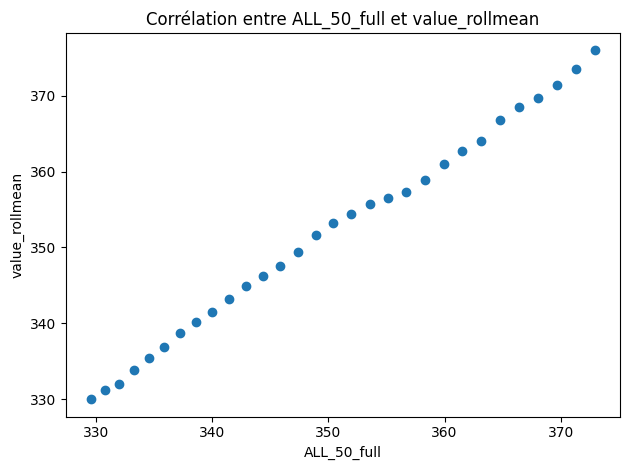

In [31]:
plt.scatter(B[predictor], A[features])
plt.xlabel(predictor)
plt.ylabel(features)
plt.title(f'Corrélation entre {predictor} et value_rollmean')
plt.tight_layout()
plt.show()

<span style="color:green">
 la sélection de value_rollmean et ALL_50_full pour la comparaison 
    <br>
`value_rollmean` représente moyenne glissante de 11 valeurs de d'emission de CO2 
    <br>
et `ALL_50_full` qui est la moyenne entre les sites LD et DML lissées sur une plage de 50 ans
    <br>
les deux données sont en accord l'un avec l'autre sur la période de temps couverte, ce qui indique que les tendances observées à Mauna Loa sont cohérentes avec les valeurs obtenues de ALL_50_full , on a une corrélation positive .


4. Créez une table `df_indus_new` qui conserve les valeurs des carottes glaciaires de 1000 à 1974 et utilisent ensuite les valeurs de Mauna Loa de 1974 jusqu'à maintenant.


In [32]:
df_indus_new = df_indus.loc[ df_indus['Year'] <= 1974 ] 

In [33]:
df_mlo_A = df_mlo_yearly.loc[df_mlo_yearly['year'] > 1974 ]


In [34]:
df_mlo_A.columns = ['Year' , 'CO2'] 
df_indus_new.columns = ['Year' ,'CO2'] 

In [35]:
df_indus_new  = pd.concat( [df_indus_new , df_mlo_A ] )  
df_indus_new.head()


,Year,CO2
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72


In [36]:
df_indus_new.describe()

,Year,CO2
count,1024.00000,1024.000000
mean,1511.50000,287.107156
std,295.74764,21.352531
min,1000.00000,276.450000
25%,1255.75000,279.610000
50%,1511.50000,281.015000
75%,1767.25000,282.247500
max,2023.00000,419.244175


5. Faites une figure qui représente les enregistrements de CO2 atmosphérique de l'an 1000 jusqu'à aujourd'hui. Comparez les dynamiques ou du moins l'étendue des valeurs avant versus après 1800 (date approximative de la révolution industrielle).

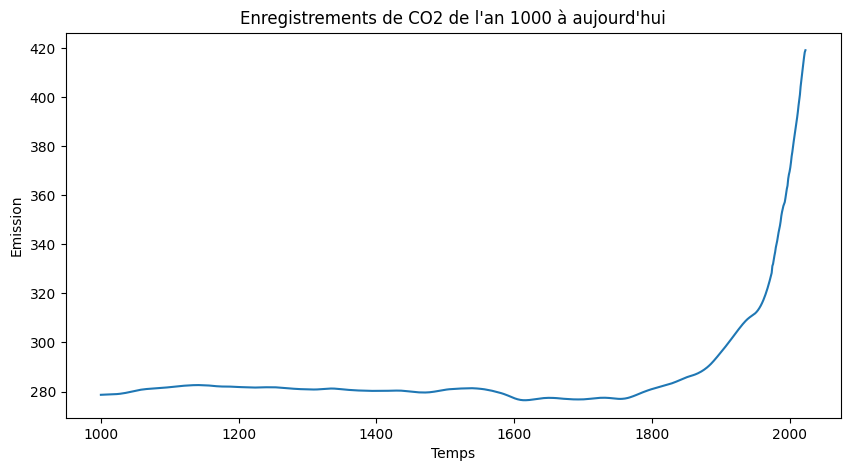

In [37]:
plt.figure(figsize=(10
                , 5))
plt.plot(df_indus_new['Year'], df_indus_new['CO2']  )
plt.xlabel("Temps")
plt.ylabel("Emission")
plt.title("Enregistrements de CO2 de l'an 1000 à aujourd'hui")
plt.show()

<span style="color:green">
Il est clair que la concentration de CO2 est restée relativement stable et basse avant 1800, ce qui correspond à la période préindustrielle. Après 1800, qui marque approximativement le début de la révolution industrielle, on observe une augmentation significative de la concentration de CO2, qui s'accélère fortement à mesure que l'on se rapproche de l'époque actuelle


#### Les données encore (!) plus anciennes

En 2008, les carottes de glace de l'Antarctique Vostok et EPICA Dome C ont fourni un enregistrement composite des niveaux de CO2 atmosphérique au cours des 800 000 dernières années ([Lüthi et al., 2008](https://pubmed.ncbi.nlm.nih.gov/18480821/)).

Le jeu de données est une fois de plus stocké dans un format texte. Il utilise également des tabulations comme séparateurs et comprend 2 colonnes pour 1096 lignes. Il contient l'année avant le présent, ce qui signifie [avant 1950](https://www.artobatours.com/articles/archaeology/bp-bc-bce-ad-ce-cal-mean/), et les enregistrements de CO2. Cela signifie que, par exemple, la première année étant 137 BP correspond en réalité à l'année 1813.

1. Le jeu de données est à cette [adresse](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3-composite-co2-2008-noaa.txt)
Chargez le jeu de données dans la table `df_icecore` et modifiez l'année  afin que le tracé puisse être affiché correctement et comparé aux autres jeux de données

In [38]:
filename = f"edc3-composite-co2-2008-noaa.txt"
url = f"https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/{filename}"
if not Path(filename).is_file():
   urlretrieve(url, filename)

In [39]:
def read_file(file):
    return pd.read_csv(file, sep = '\t' , comment = '#' )

In [40]:
df_icecore = read_file(filename)

In [41]:
df_icecore['gas_ageBP'] = 1950 - df_icecore ['gas_ageBP']

In [42]:
df_icecore.columns = ['Year' , 'CO2']
df_icecore.head()

,Year,CO2
0,1813,280.4
1,1682,274.9
2,1671,277.9
3,1555,279.1
4,1546,281.9


2. Visualisez les trois jeux de données sur une même figure (avec les années en axe des x et la concentration de CO2 en y). 

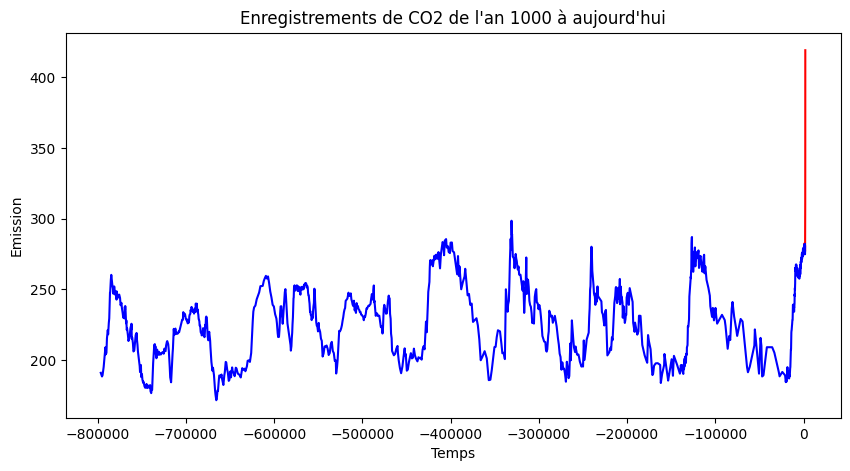

In [43]:
plt.figure(figsize=(10 , 5))

plt.plot(df_indus_new['Year'], df_indus_new['CO2'] , color = 'red' )
plt.plot(df_icecore['Year'] , df_icecore['CO2'] , color = 'blue') 
plt.xlabel("Temps")
plt.ylabel("Emission")
plt.title("Enregistrements de CO2 de l'an 1000 à aujourd'hui")
plt.show()

3. Zoomez sur la période entre 1000 et 2023 où plusieurs jeux de donénes se superposent.

In [44]:
df_icecore_zoomed = df_icecore.loc[df_icecore['Year'] > 1000 ]

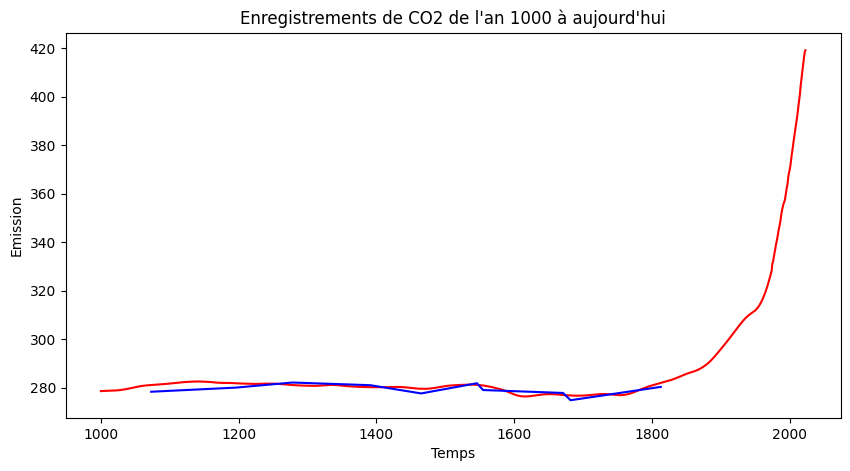

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(df_indus_new['Year'], df_indus_new['CO2'] , color = 'red'  )
plt.plot(df_icecore_zoomed['Year'] , df_icecore_zoomed['CO2'] , color = 'blue') 
plt.xlabel("Temps")
plt.ylabel("Emission")
plt.title("Enregistrements de CO2 de l'an 1000 à aujourd'hui")
plt.show()

## Conclusion

Indiquez ci-dessous les conclusions que vous estimez pertinentes. Pour vous aider voici une liste (non exhaustive) de questions:

- Les données récentes sont-elles compatibles avec l'analyse de températures du TP1
- Les différentes méthodes concordent-elles ?
- Y a t il une période durant laquelle la concentration en CO2 est particulièrement plus élevée ? Est-ce qu'il existe une corrélation (pas forcément une causalité) avec les activités humaines ? Pourriez vous proposer une hypothèse d'interprétation ?
- Avez-vous des suggestions pour faire d'autres analyses complémentaires ?

<span style="color:green">
Votre réponse ici


### Les données récentes sont-elles compatibles avec l’analyse de températures de l'essonne ?

Les données actuelles montrent une nette croissance des émissions de CO2 depuis l'époque de la révolution industrielle, marquant une ère où l'industrialisation et l'expansion économique ont commencé à exercer un impact environnemental significatif. Dans la continuité des observations faites lors du premier travail pratique, on note une élévation de la température moyenne annuelle de 1,5 degré Celsius sur une période débutant en 1950, qui coïncide avec l'accélération industrielle post-Seconde Guerre mondiale et se poursuit jusqu'en 2022. Cette convergence des périodes suggère une corrélation, qui n'implique pas nécessairement une causalité, entre l'intensification des activités anthropogéniques, notamment la combustion de combustibles fossiles pour l'énergie, et les tendances au réchauffement climatique mesurées.

### Les différentes méthodes concordent-elles ?

les différentes méthodes concordent ,  cela prouve que les augmentations observées dans les deux types de données sont liées.

### Y a t il une période durant laquelle la concentration en CO2 est particulièrement plus élevée ? Est-ce qu'il existe une corrélation (pas forcément une causalité) avec les activités humaines ? Pourriez vous proposer une hypothèse d'interprétation ?

La période pendant laquelle la concentration en CO2 dans l'atmosphère est particulièrement élevée correspond clairement à l'ère post-industrielle, et plus précisément depuis le milieu du 20ème siècle. Cette augmentation coïncide avec la croissance massive de la production industrielle, l'urbanisation accélérée, la déforestation et l'utilisation croissante de combustibles fossiles. Ces activités humaines, surtout la combustion de charbon, de pétrole et de gaz naturel pour l'énergie et le transport, ainsi que les pratiques agricoles intensives, sont des sources majeures de gaz à effet de serre.

Une interprétation possible de l'augmentation des niveaux de CO2 pourrait se référer à l'idée que nous sommes entrés dans un nouvel période. Cette période est marquée par une hausse notable des émissions de CO2 et d'autres gaz à effet de serre, qui modifient profondément le climat de notre planète. Cette transformation se manifeste par un réchauffement global observable. La relation observée entre la montée des taux de CO2 et l'augmentation des températures globales peut s'expliquer par un effet de serre intensifié, où le CO2 et d'autres gaz retiennent davantage de chaleur dans l'atmosphère terrestre, limitant ainsi la capacité naturelle de la Terre à se refroidir et résultant en une hausse des températures moyennes à l'échelle mondiale

### D'autres analyses complémentaires ?

Une analyse détaillée des tendances de consommation énergétique pourrait révéler des liens directs entre les modes de vie humains, la demande énergétique et les pics d'émissions de CO2.
une évaluation approfondie des politiques de réduction des émissions permettrait de mesurer l'efficacité des stratégies actuelles et de planifier des actions futures plus ciblées.